In [1]:
import os
import sys

# Move up to the correct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print("Updated Python path:", sys.path)  # Debugging check

Updated Python path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env', '', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\D

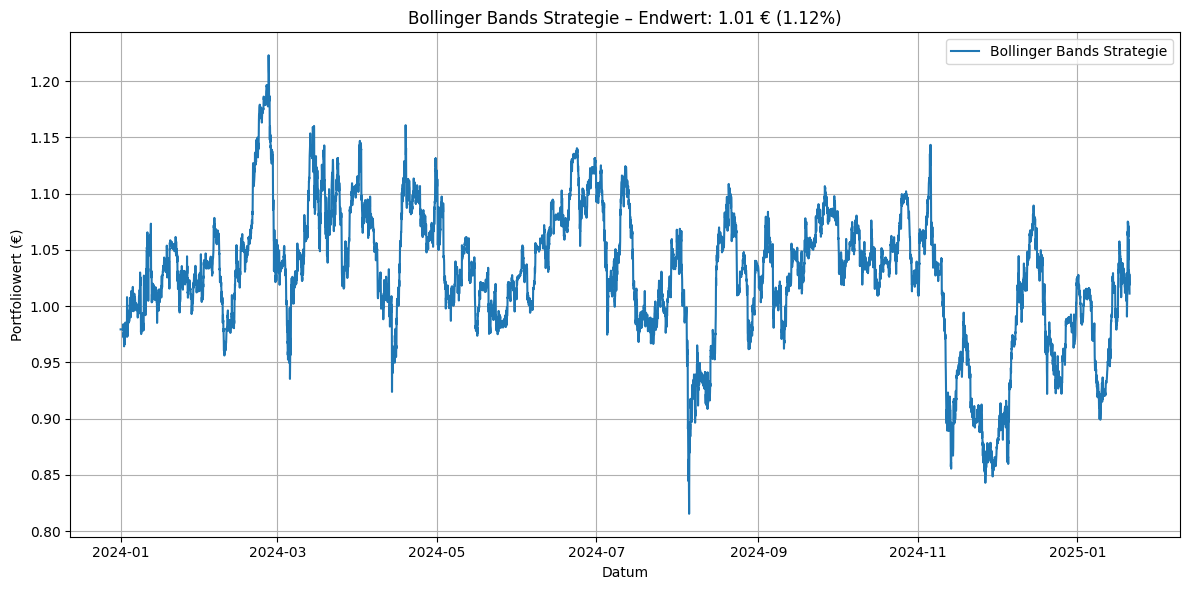

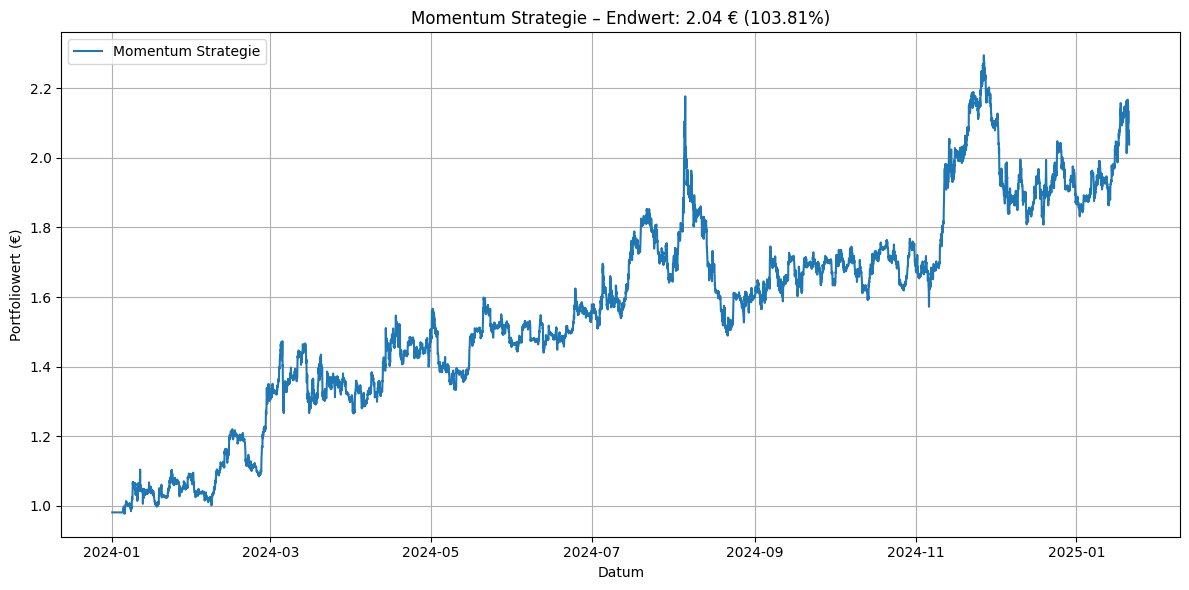

Final portfolio value: 2.09 USD
Profit: 1.09 USD
Annualized Return: 100.75%
Sharpe Ratio: 1.59
Max Drawdown: -31.89%
Win Rate: 42.86%
Loss Rate: 57.14%


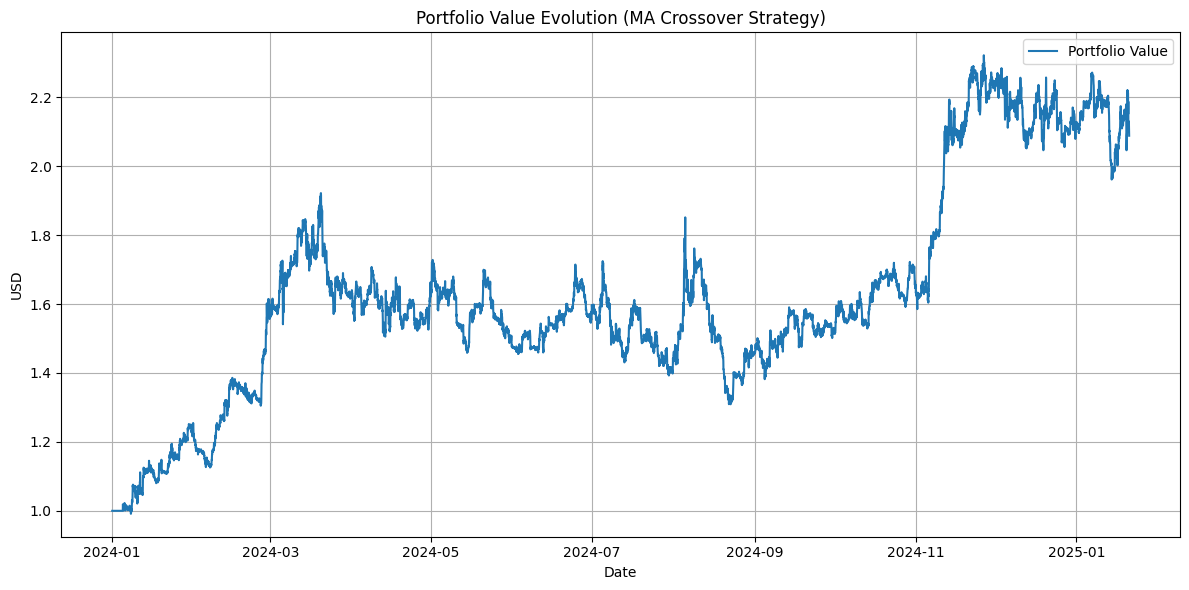

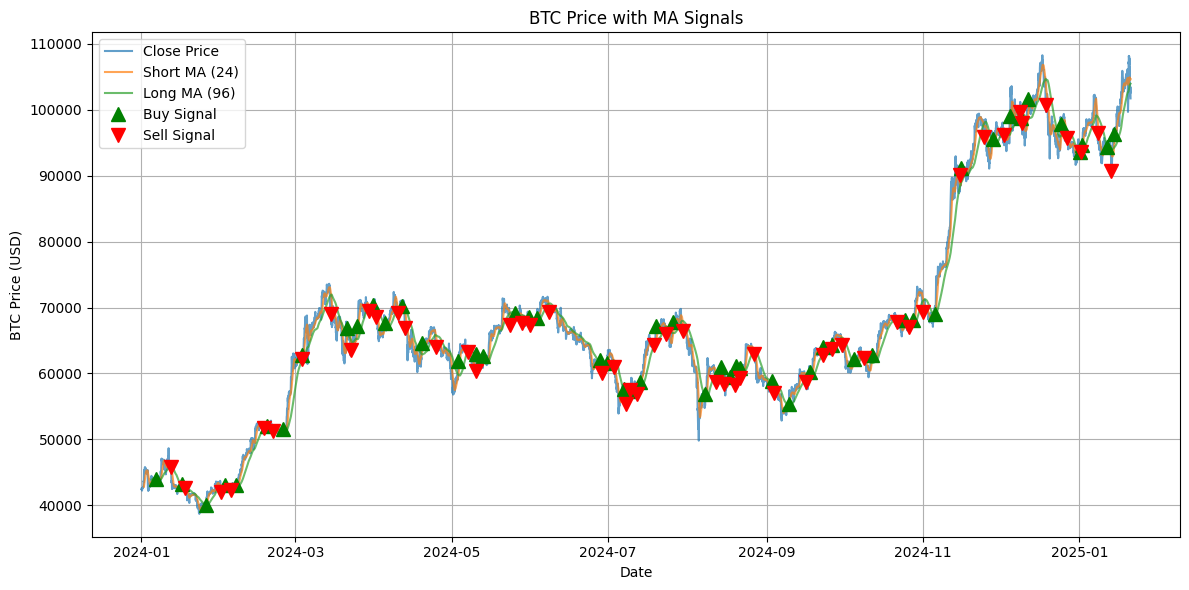

Updated Python path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env', '', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\D

c:\Users\ntekaatl\OneDrive - Cisco\Documents\A Studientarbeit\Kaka\Studienarbeit\trading_env\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.69GB > 2.56GB
  warnings.warn(


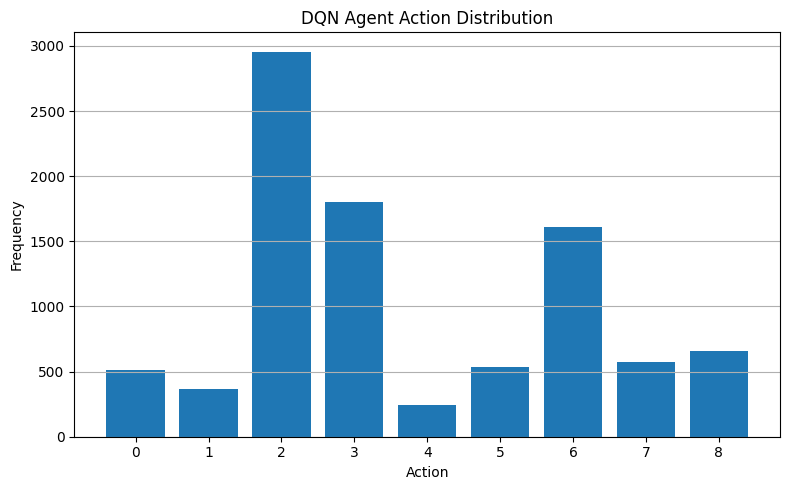

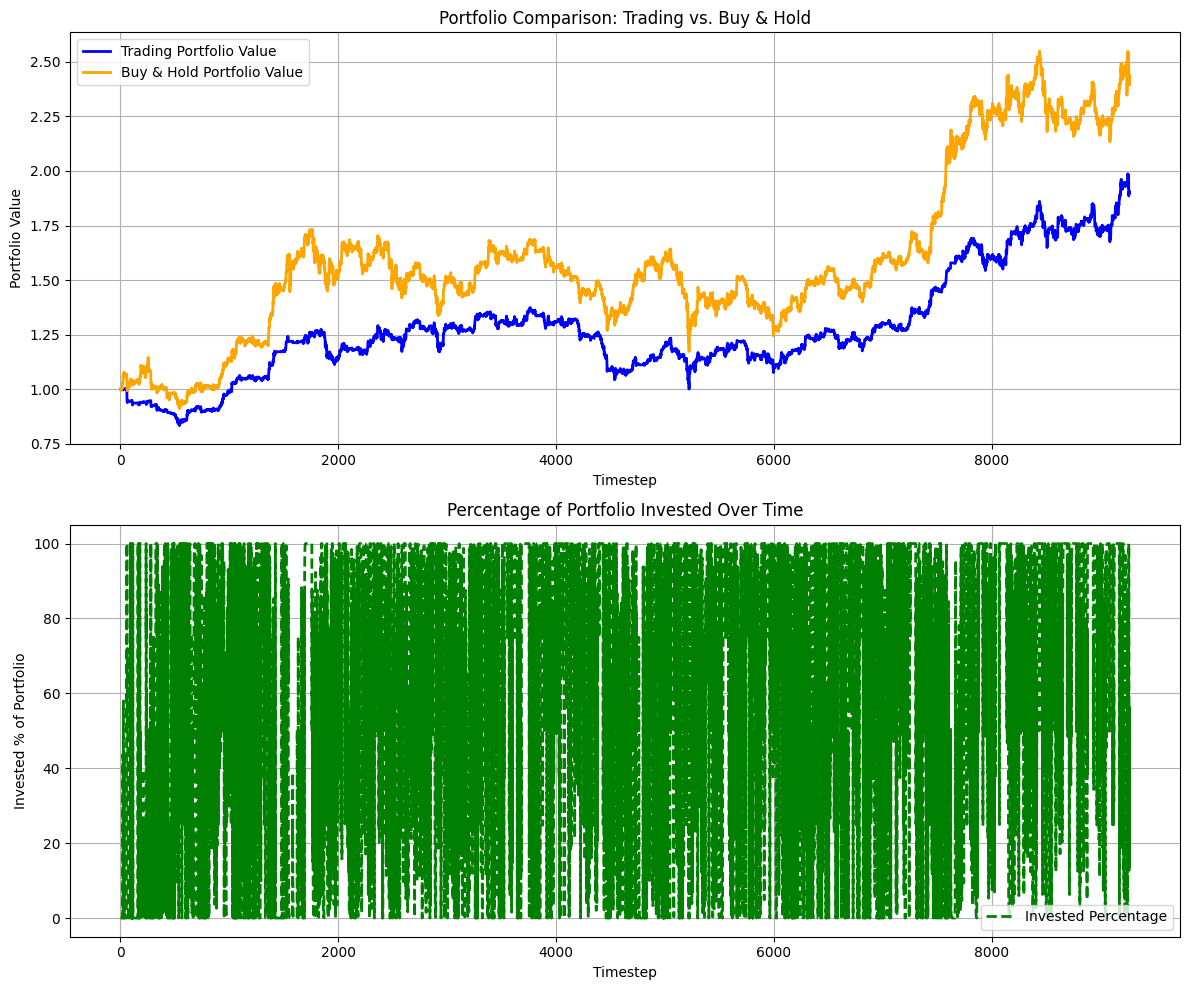

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 01:00:00',
               '2024-01-01 02:00:00', '2024-01-01 03:00:00',
               '2024-01-01 04:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)
Seed in the environment: 42
Seed in the environment: 42


c:\Users\ntekaatl\OneDrive - Cisco\Documents\A Studientarbeit\Kaka\Studienarbeit\trading_env\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.69GB > 2.50GB
  warnings.warn(


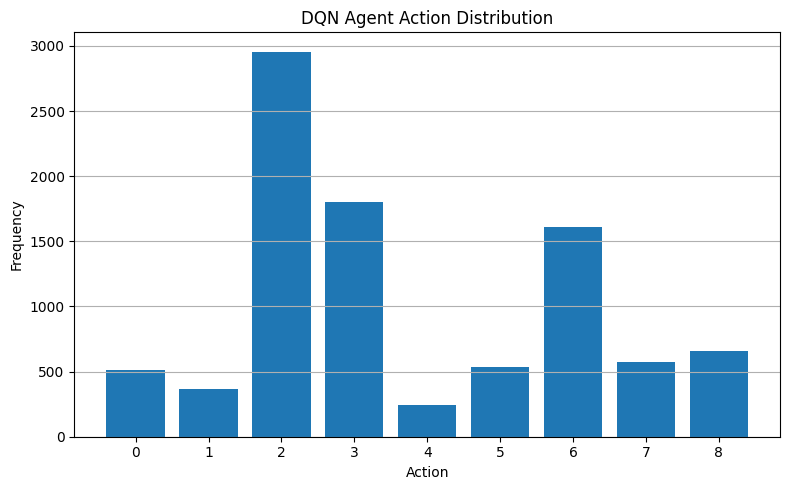

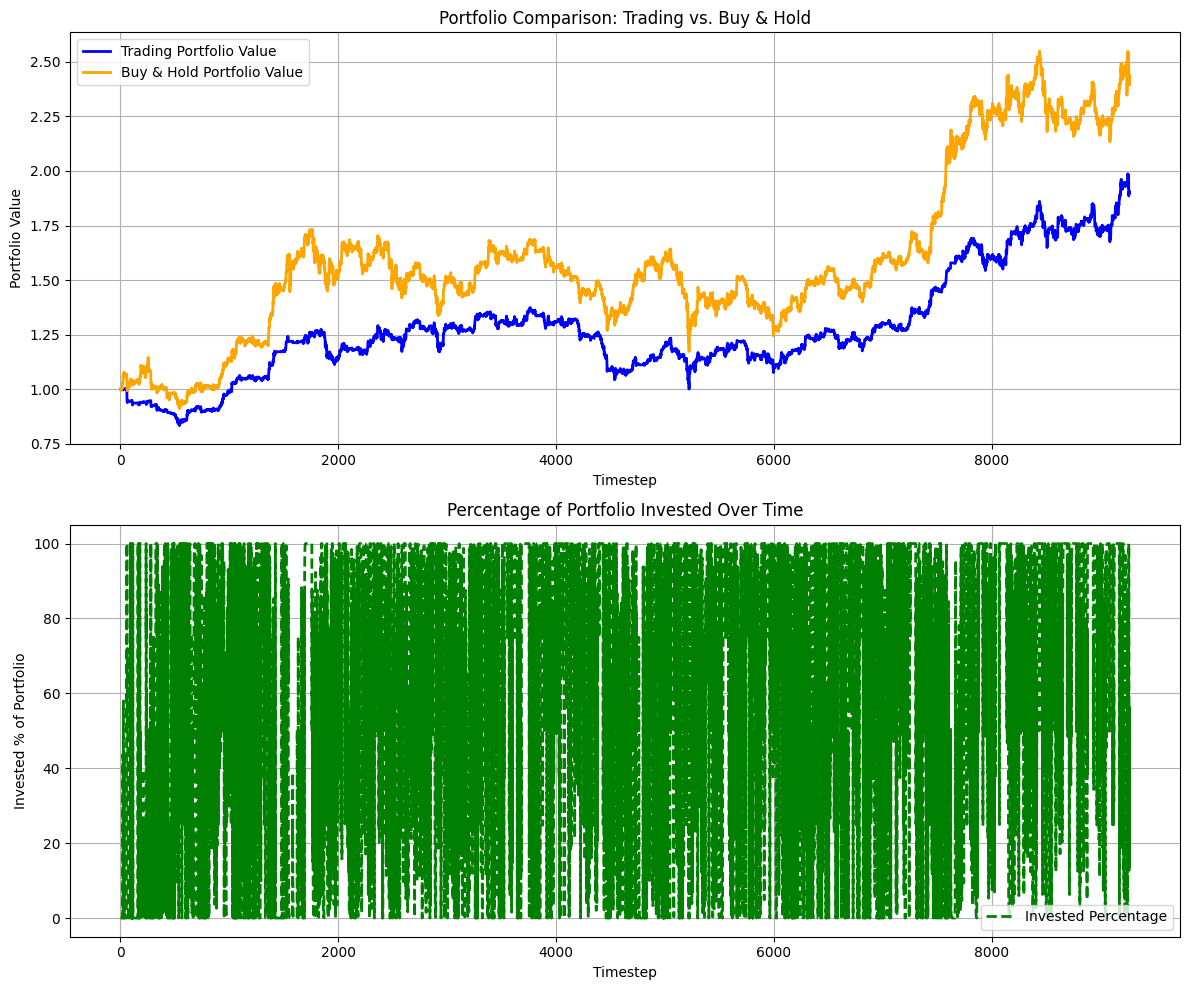

final_portfolio_value: 1.9004
profit: 0.9004
annualized_return: 0.8350
sharpe_ratio: 1.8276
max_drawdown: -0.2710
win_rate: 0.4582
loss_rate: 0.4347
Updated Python path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env', '', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32', 'c:\\Users\\ntekaatl\\OneDri

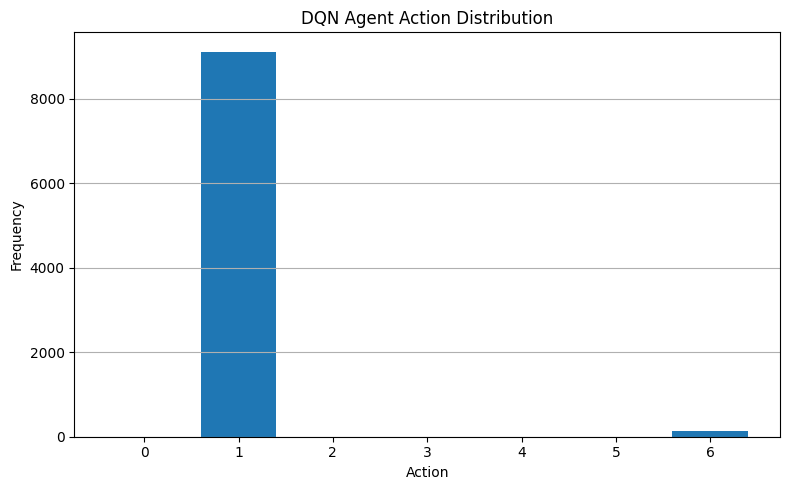

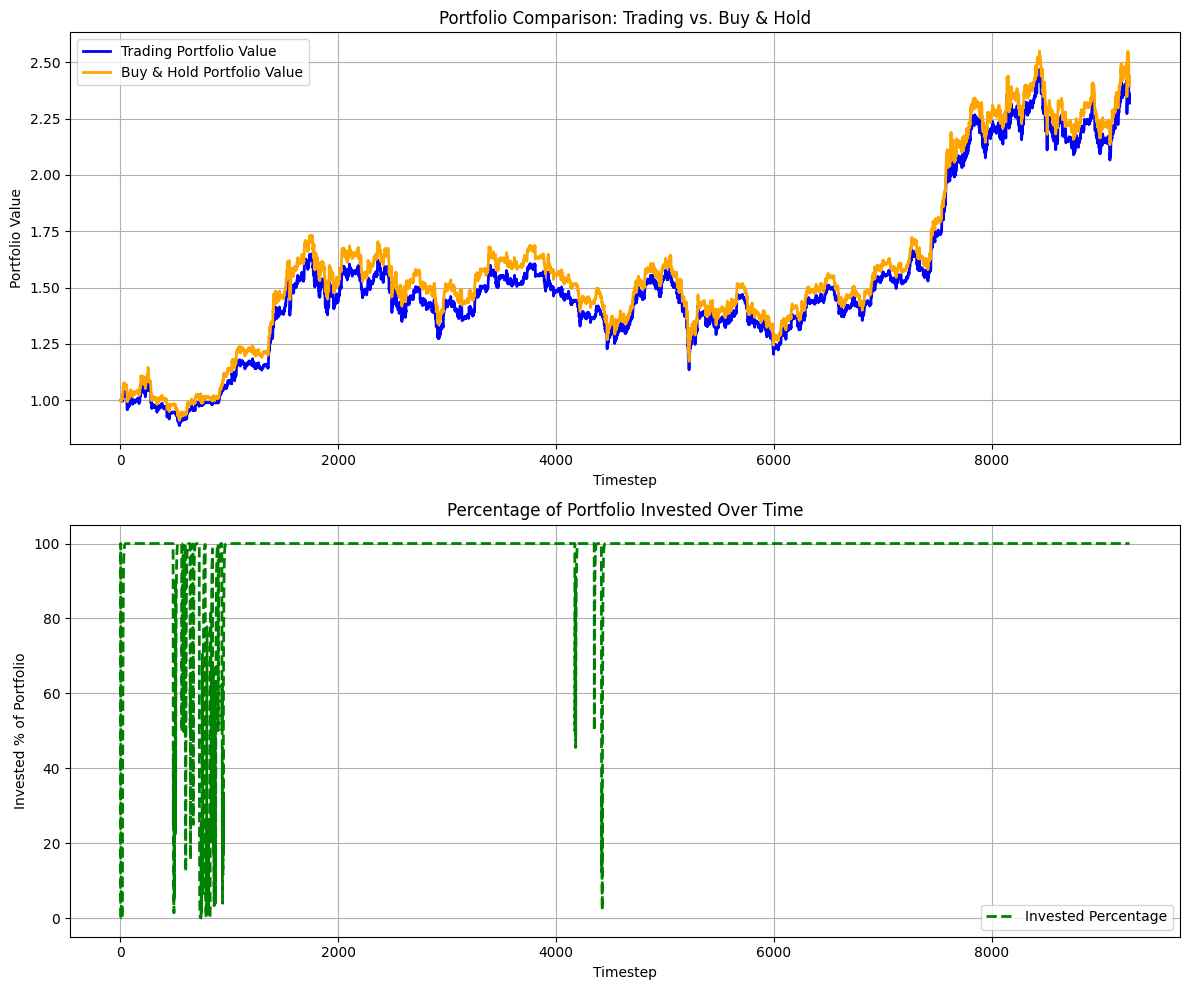

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 01:00:00',
               '2024-01-01 02:00:00', '2024-01-01 03:00:00',
               '2024-01-01 04:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)
Seed in the environment: 42
Seed in the environment: 42


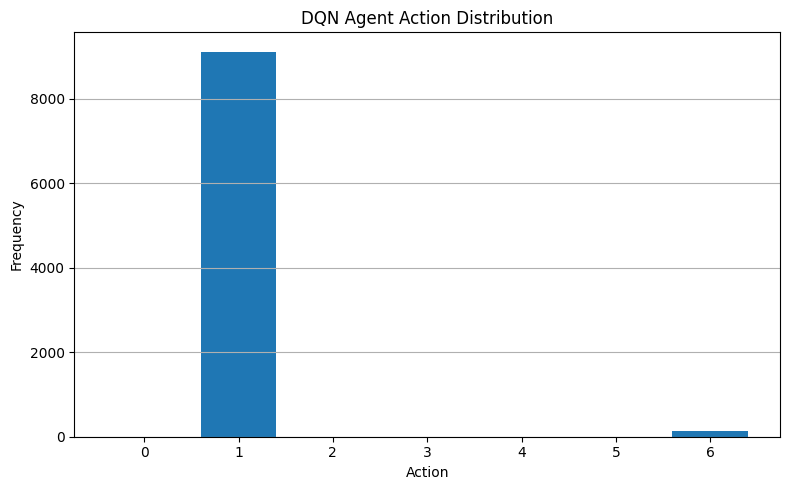

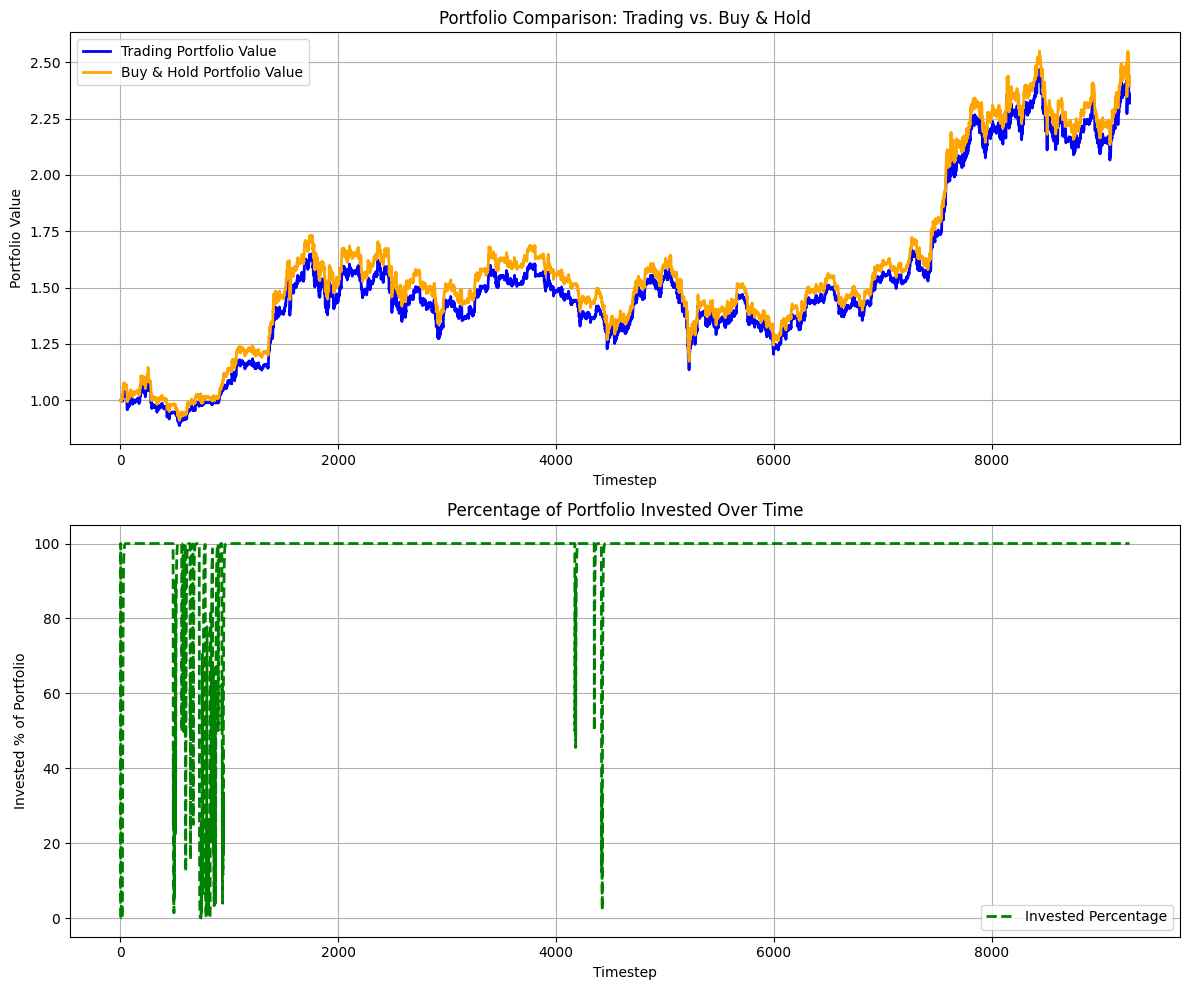

final_portfolio_value: 2.3189
profit: 1.3189
annualized_return: 1.2150
sharpe_ratio: 1.7751
max_drawdown: -0.3119
win_rate: 0.5122
loss_rate: 0.4860
Updated Python path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env', '', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32', 'c:\\Users\\ntekaatl\\OneDri

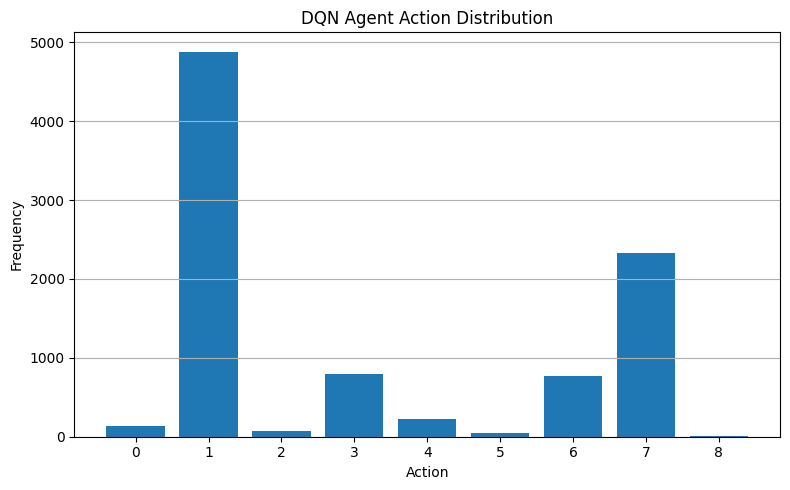

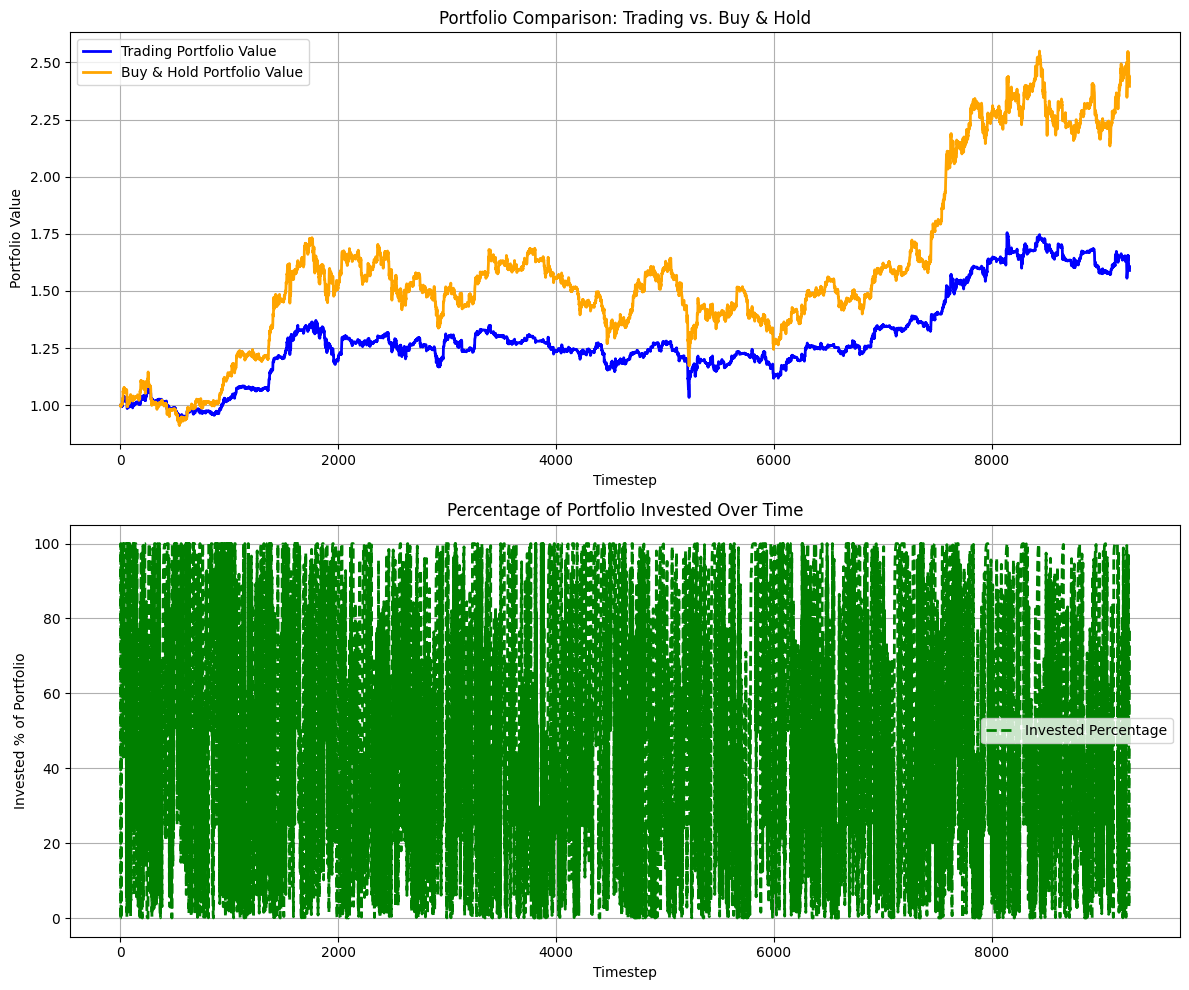

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 01:00:00',
               '2024-01-01 02:00:00', '2024-01-01 03:00:00',
               '2024-01-01 04:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)
Seed in the environment: 42
Seed in the environment: 42


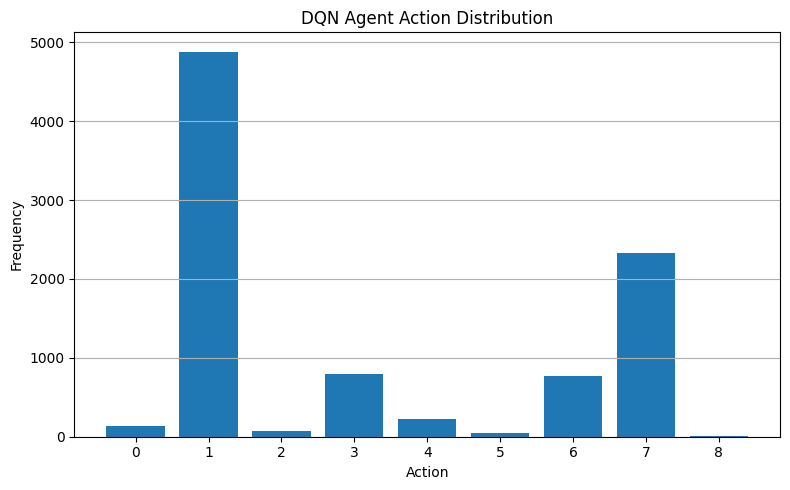

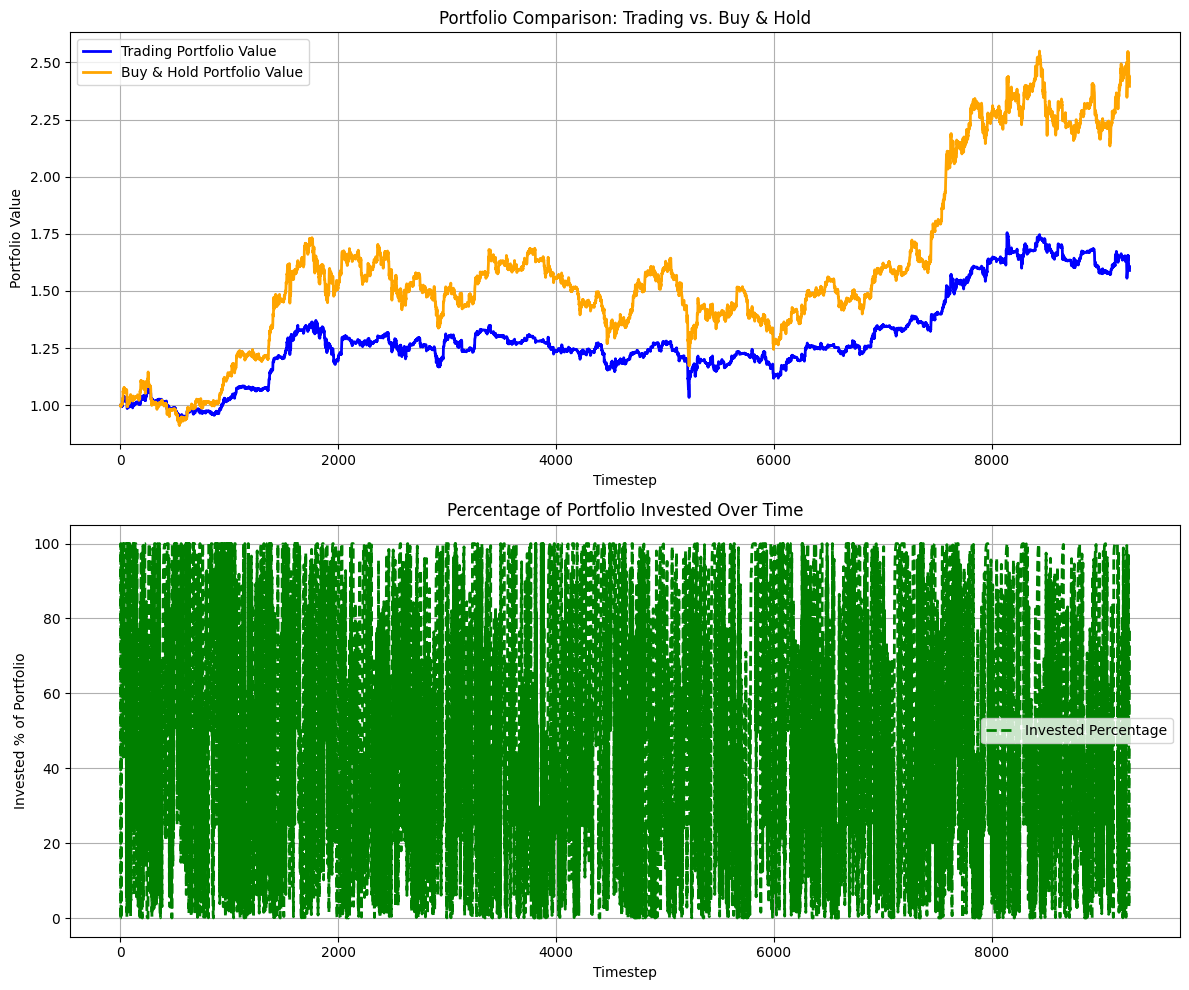

final_portfolio_value: 1.5898
profit: 0.5898
annualized_return: 0.5501
sharpe_ratio: 1.4398
max_drawdown: -0.2457
win_rate: 0.5120
loss_rate: 0.4859


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from Strategien.bollinger_strategy import run_bollinger_strategy
from Strategien.momentum import run_momentum_strategy
from Strategien.Moving_Average import run_moving_average_strategy
from Strategien.Buy_and_Hold import run_buy_and_hold_strategy


from RL_Backtest_Agents.DQN_Backtest_v1 import run_dqn_backtest_v1, compute_backtest_metrics
from RL_Backtest_Agents.DQN_Backtest_v2 import run_dqn_backtest_v2 
from RL_Backtest_Agents.DQN_Backtest_v3 import run_dqn_backtest_v3 
from RL_Backtest_Agents.DQN_Backtest_v4 import run_dqn_backtest_v4


#from RL_Backtest_Agents.PPO_Backtest_v1 import run_ppo_backtest_v1
#from RL_Backtest_Agents.PPO_Backtest_v2 import run_ppo_backtest_v2
#from RL_Backtest_Agents.A2C_Backtest_v1 import run_a2c_backtest_v1
#from RL_Backtest_Agents.A2C_Backtest_v2 import run_a2c_backtest_v2
#from RL_Backtest_Agents.A2C_Backtest_v3 import run_a2c_backtest_v3
#from RL_Backtest_Agents.A2C_Backtest_v4 import run_a2c_backtest_v4


# A2C Agenten vergleichen

In [ ]:
# Strategien ausführen
a2c_result_v1 = run_a2c_backtest_v1()
a2c_result_v2 = run_a2c_backtest_v2()

# Portfolios extrahieren
strategies = {
    
    "A2C Agent_v1": a2c_result_v1["portfolio"],
    "PPO Agent_v2": a2c_result_v2["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# DQN Agenten vergleichen

Seed in the environment: 42
Seed in the environment: 42


c:\Users\ntekaatl\OneDrive - Cisco\Documents\A Studientarbeit\Kaka\Studienarbeit\trading_env\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.69GB > 2.64GB
  warnings.warn(


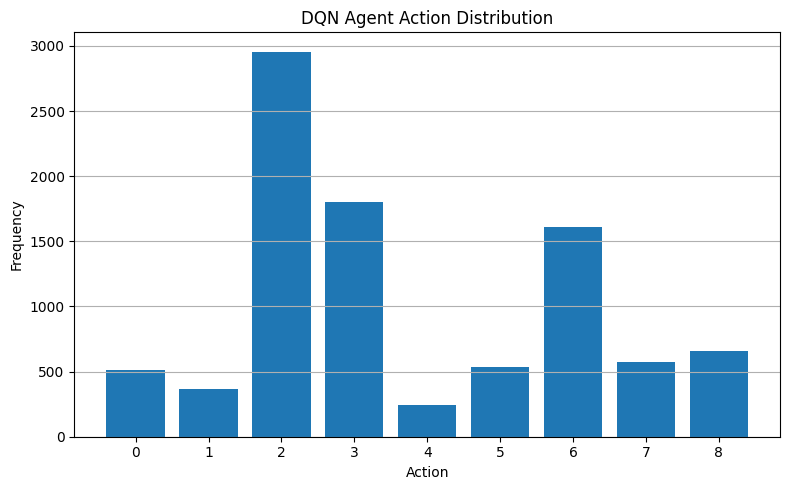

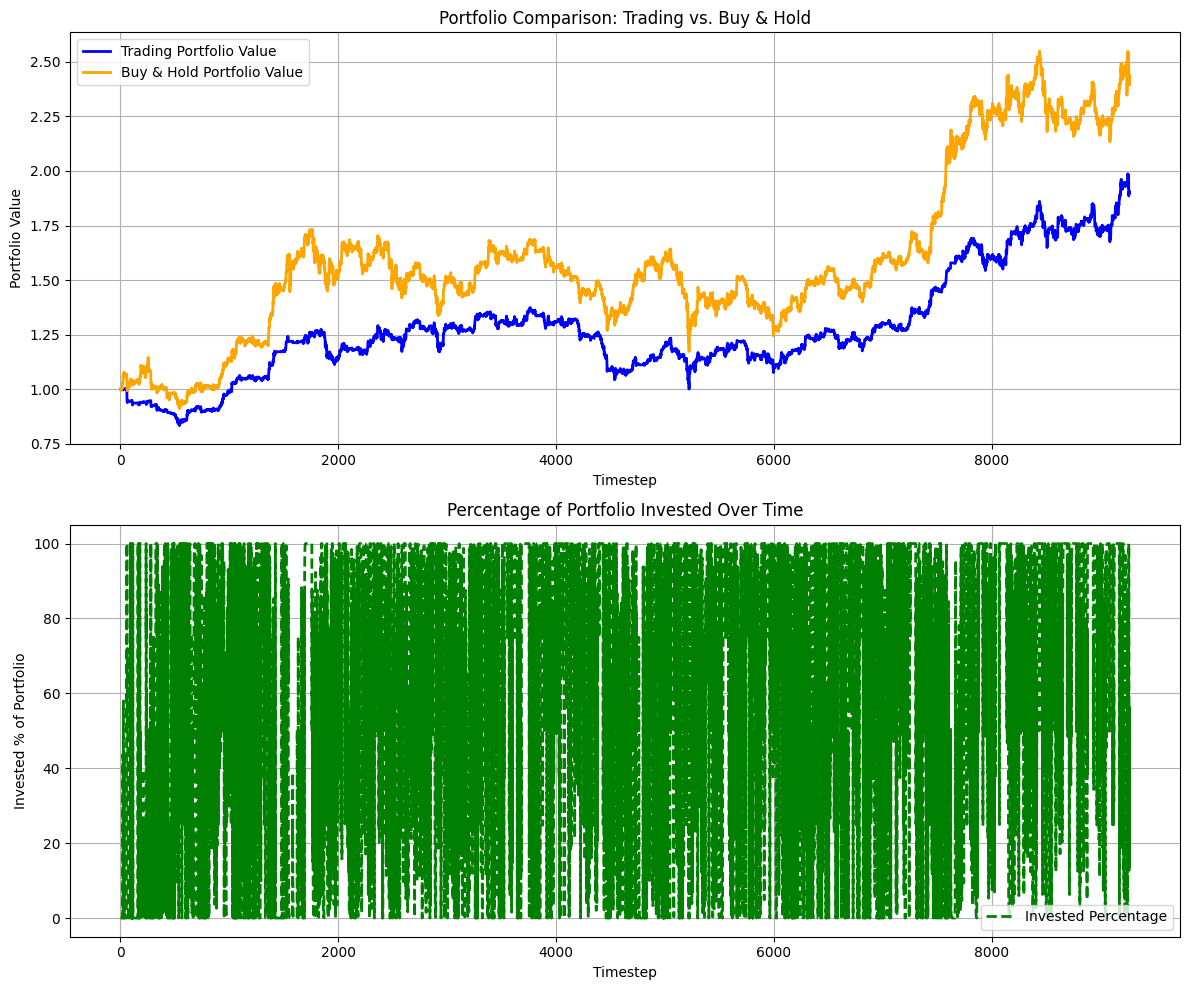

Seed in the environment: 42
Seed in the environment: 42


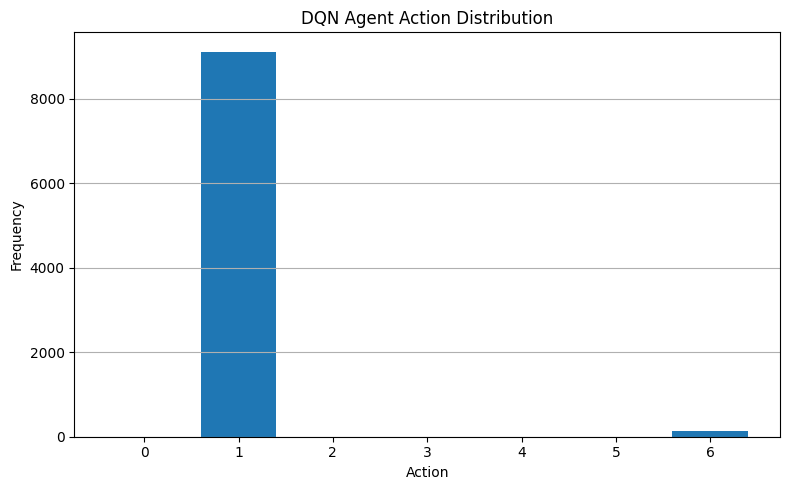

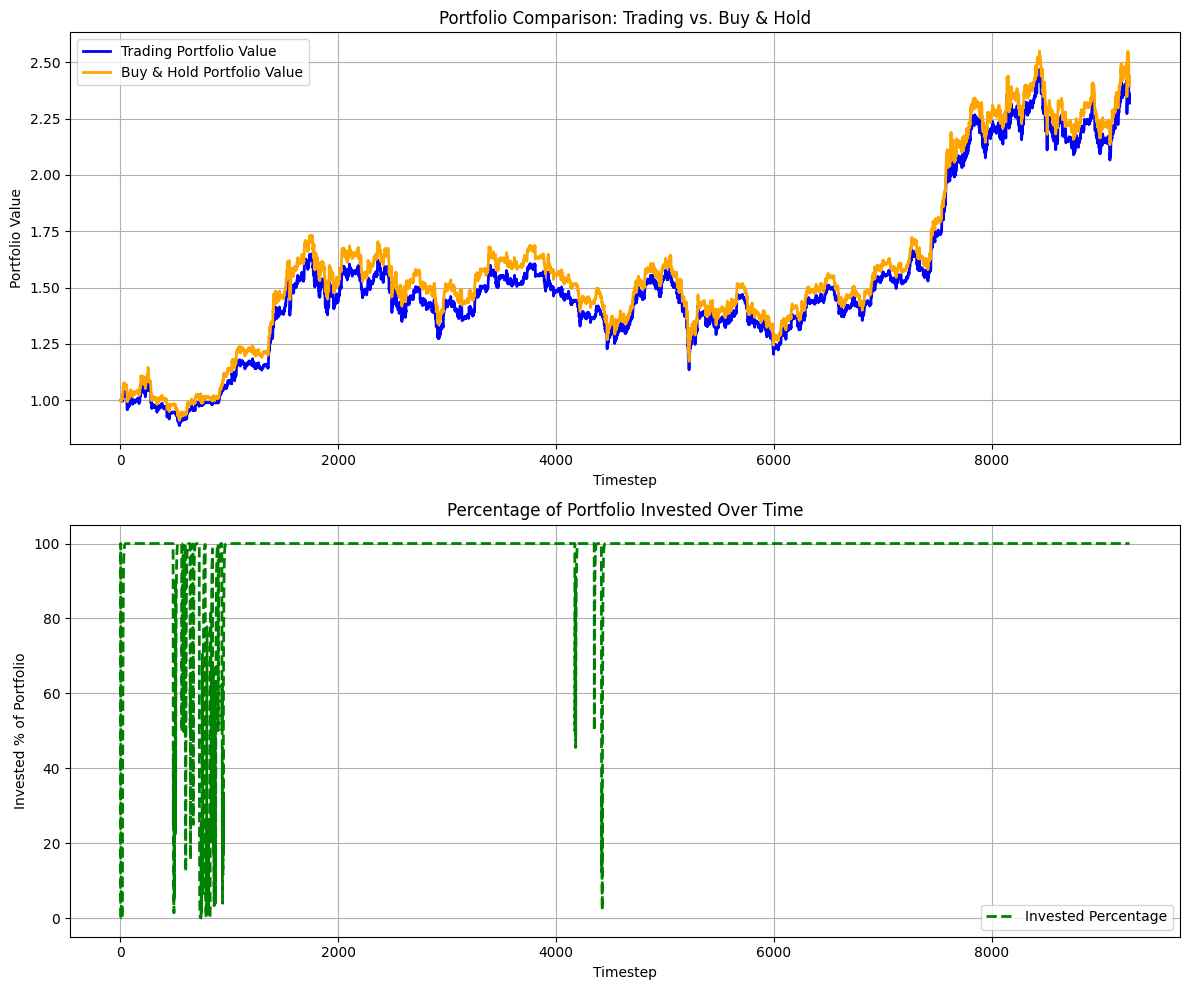

Seed in the environment: 42
Seed in the environment: 42


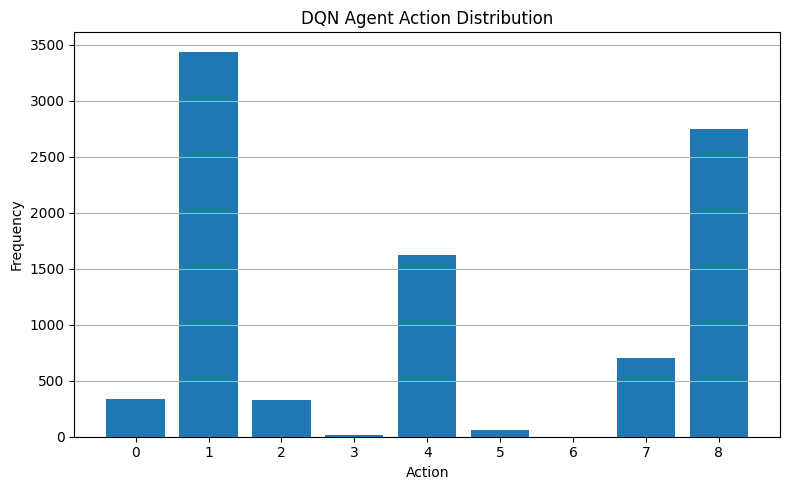

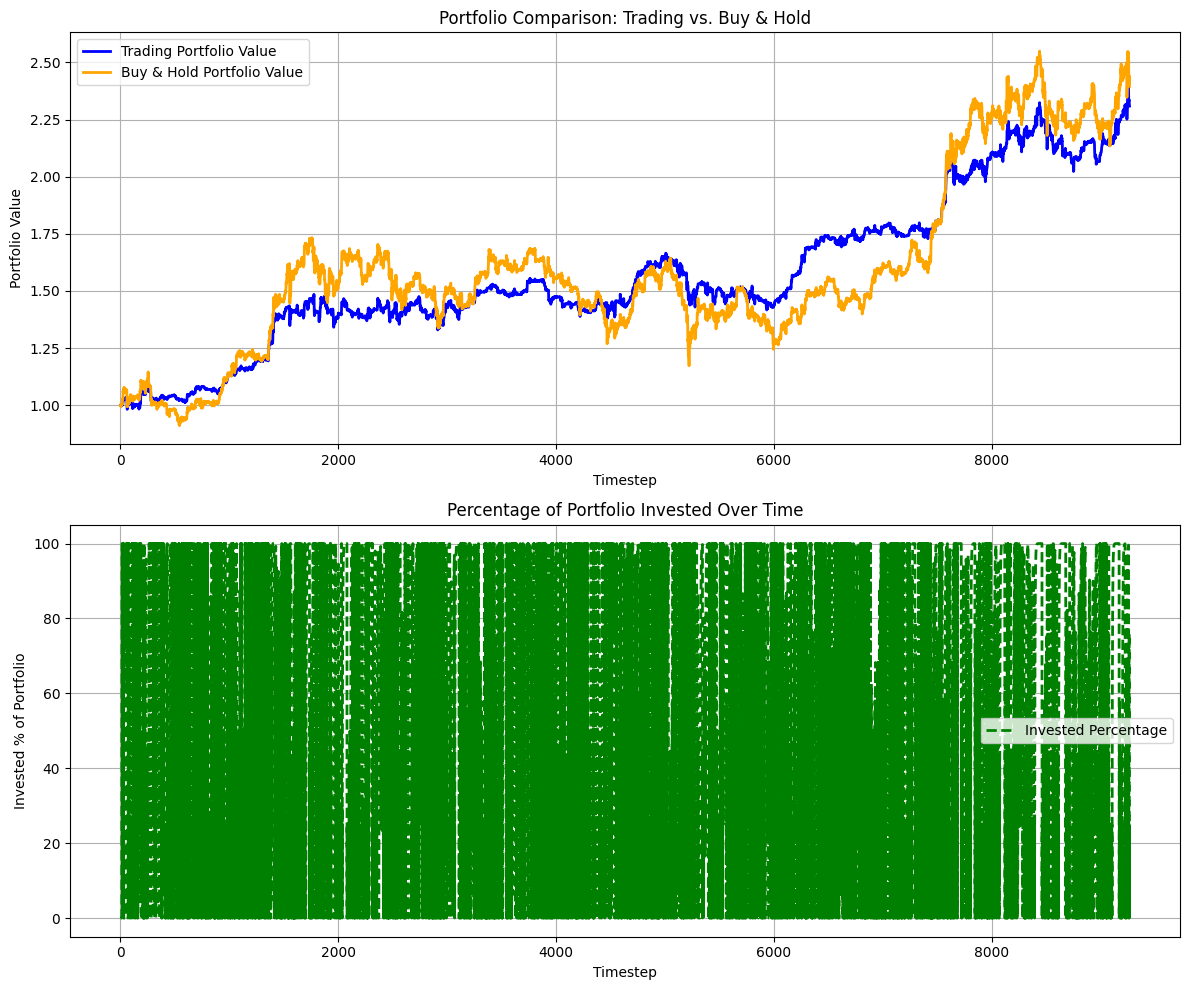

Seed in the environment: 42
Seed in the environment: 42


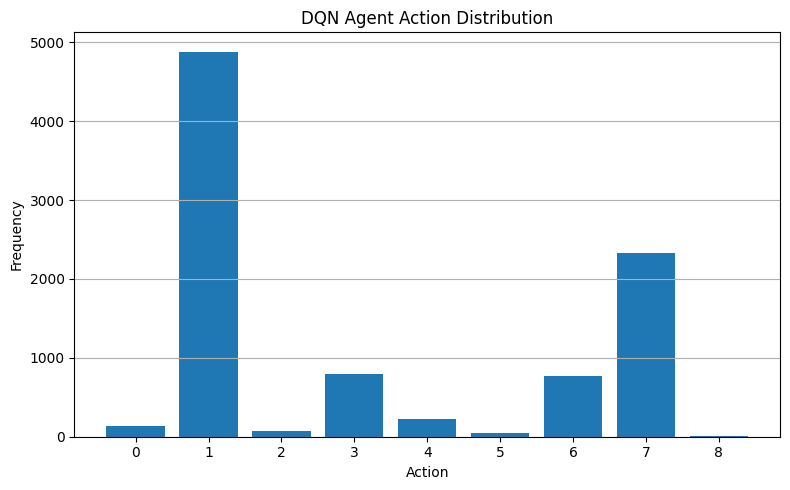

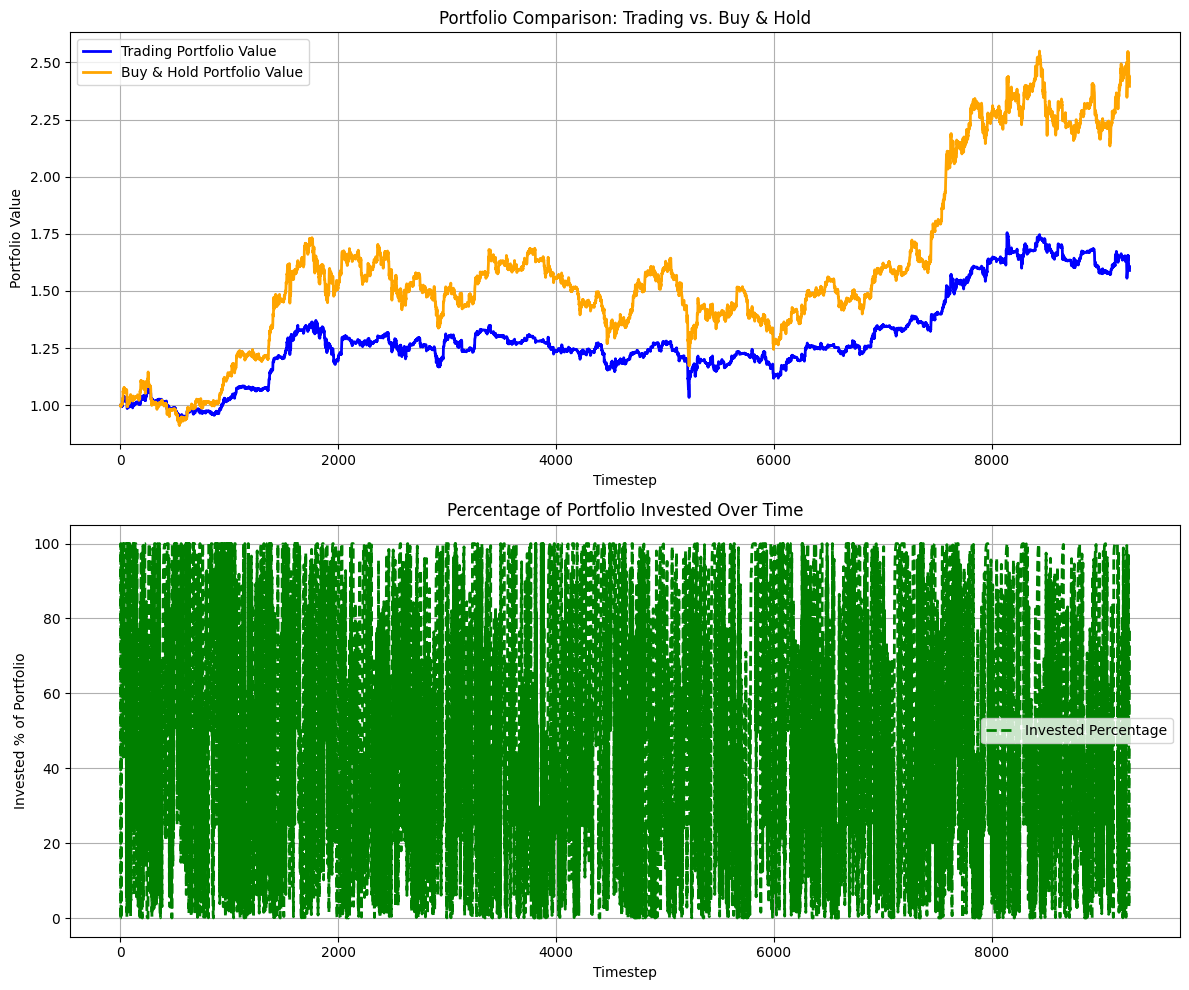

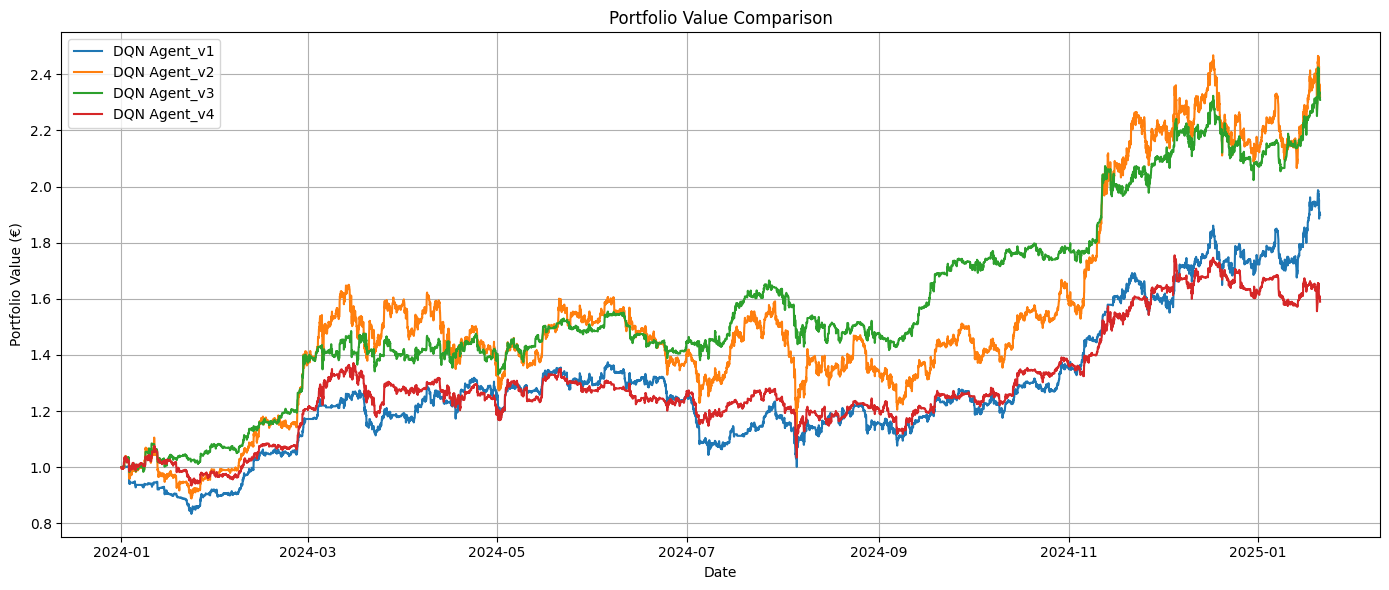

In [5]:
# Strategien ausführen
dqn_result_v1 = run_dqn_backtest_v1()
dqn_result_v2 = run_dqn_backtest_v2()
dqn_result_v3 = run_dqn_backtest_v3()
dqn_result_v4 = run_dqn_backtest_v4()



# Portfolios extrahieren
strategies = {
   
    "DQN Agent_v1": dqn_result_v1["portfolio"],
    "DQN Agent_v2": dqn_result_v2["portfolio"],
    "DQN Agent_v3": dqn_result_v3["portfolio"],
    "DQN Agent_v4": dqn_result_v4["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
results = {}
for name, values in strategies.items():
    metrics = compute_backtest_metrics(values)
    results[name] = metrics

pd.DataFrame(results).T.round(4)

,final_portfolio_value,profit,annualized_return,sharpe_ratio,max_drawdown,win_rate,loss_rate
DQN Agent_v1,1.9004,0.9004,0.8350,1.8276,-0.2710,0.4582,0.4347
DQN Agent_v2,2.3189,1.3189,1.2150,1.7751,-0.3119,0.5122,0.4860
DQN Agent_v3,2.3088,1.3088,1.2059,2.4677,-0.1491,0.3403,0.3136
DQN Agent_v4,1.5898,0.5898,0.5501,1.4398,-0.2457,0.5120,0.4859


# PPO Agenten vergleichen

Seed in the environment: 42
Seed in the environment: 42


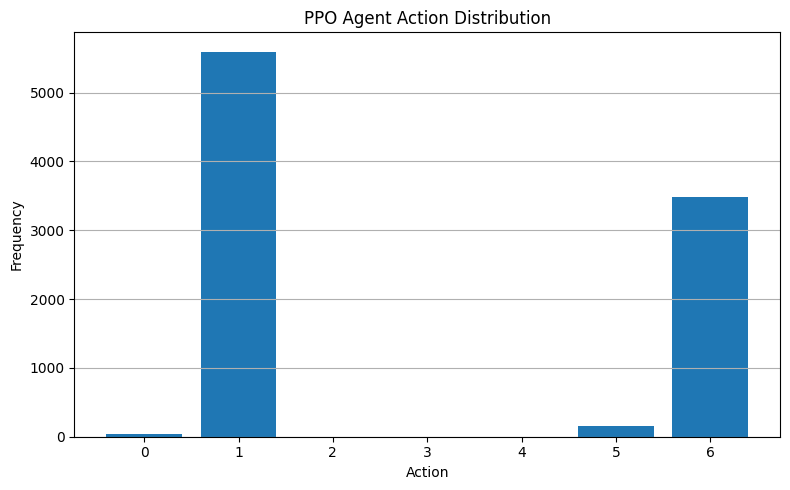

Seed in the environment: 42
Seed in the environment: 42


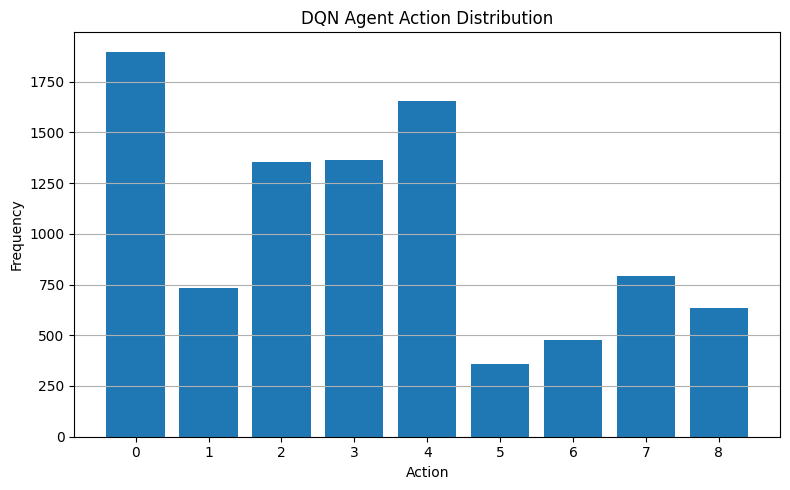

In [ ]:
# Strategien ausführen
ppo_result_v1 = run_ppo_backtest_v1()
ppo_result_v2 = run_ppo_backtest_v2()

# Portfolios extrahieren
strategies = {
   
    "PPO Agent_v1": ppo_result_v1["portfolio"],
    "PPO Agent_v2": ppo_result_v2["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategien ausführen für beste Agenten und Strategien

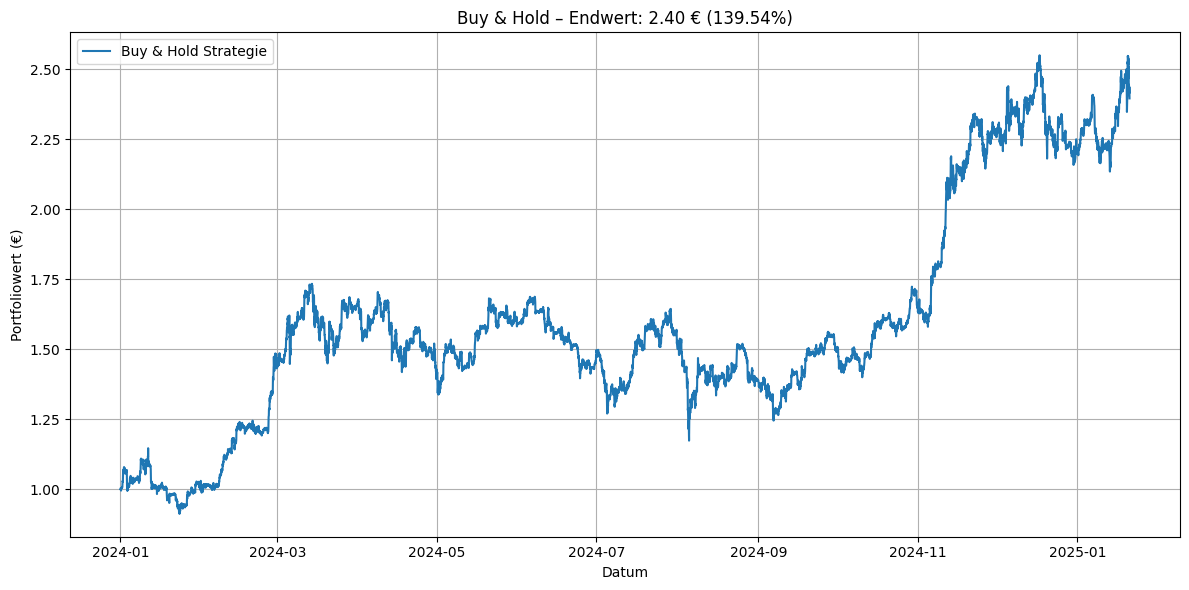

In [6]:
# Strategien ausführen
ma_result = run_moving_average_strategy()
bollinger_result = run_bollinger_strategy()
momentum_result = run_momentum_strategy()
#dqn_result = run_dqn_backtest()
bh_result = run_buy_and_hold_strategy()

#a2c_result = run_a2c_backtest()
#ppo_result = run_ppo_backtest_v2()


# Portfolios extrahieren
strategies = {
    "Moving Average": ma_result["portfolio"],
    "Bollinger Bands": bollinger_result["portfolio"],
    "Momentum": momentum_result["portfolio"],
    "Buy & Hold": bh_result["portfolio"],
    "DQN Agent": dqn_result_v3["portfolio"],
    #"A2C Agent": a2c_result["portfolio"],
    #"PPO Agent": ppo_result["portfolio"]
}


Portfoliowerte vergleichen 

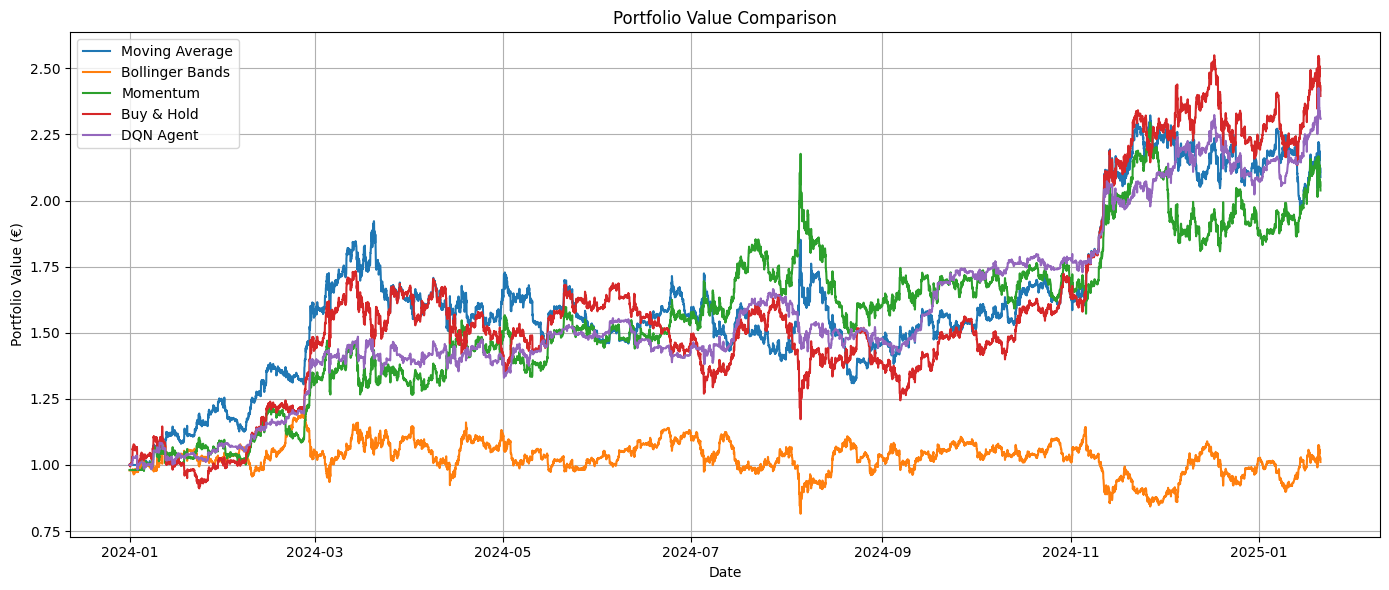

In [7]:
plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Metriken Vergleichen

In [8]:
results = {}
for name, values in strategies.items():
    metrics = compute_backtest_metrics(values)
    results[name] = metrics

pd.DataFrame(results).T.round(4)


,final_portfolio_value,profit,annualized_return,sharpe_ratio,max_drawdown,win_rate,loss_rate
Moving Average,2.0886,1.0886,1.0064,1.5876,-0.3189,0.4909,0.4970
Bollinger Bands,1.0112,0.0318,0.0307,0.3217,-0.3333,0.5127,0.4829
Momentum,2.0381,1.0569,0.9961,1.5784,-0.3159,0.4888,0.4990
Buy & Hold,2.3954,1.3954,1.2840,1.8248,-0.3233,0.5123,0.4860
DQN Agent,2.3088,1.3088,1.2059,2.4677,-0.1491,0.3403,0.3136
